In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler   
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor


In [184]:
df1 = pd.read_csv("train.csv")
df2 = pd.read_csv('fulfilment_center_info.csv')
df3 = pd.read_csv('meal_info.csv')


In [185]:
merged_df = pd.merge(df1, df3, on='meal_id')

In [186]:
merged_df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai
1,1466964,1,55,1993,136.83,135.83,0,0,270,Beverages,Thai
2,1346989,1,55,2539,134.86,135.86,0,0,189,Beverages,Thai
3,1338232,1,55,2139,339.50,437.53,0,0,54,Beverages,Indian
4,1448490,1,55,2631,243.50,242.50,0,0,40,Beverages,Indian
...,...,...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68,Desert,Indian
456544,1062036,145,61,2304,482.09,482.09,0,0,42,Desert,Indian
456545,1110849,145,61,2664,237.68,321.07,0,0,501,Salad,Italian
456546,1147725,145,61,2569,243.50,313.34,0,0,729,Salad,Italian


In [187]:
df=pd.merge(merged_df, df2, on='center_id')
df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1466964,1,55,1993,136.83,135.83,0,0,270,Beverages,Thai,647,56,TYPE_C,2.0
2,1346989,1,55,2539,134.86,135.86,0,0,189,Beverages,Thai,647,56,TYPE_C,2.0
3,1338232,1,55,2139,339.50,437.53,0,0,54,Beverages,Indian,647,56,TYPE_C,2.0
4,1448490,1,55,2631,243.50,242.50,0,0,40,Beverages,Indian,647,56,TYPE_C,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68,Desert,Indian,473,77,TYPE_A,4.5
456544,1062036,145,61,2304,482.09,482.09,0,0,42,Desert,Indian,473,77,TYPE_A,4.5
456545,1110849,145,61,2664,237.68,321.07,0,0,501,Salad,Italian,473,77,TYPE_A,4.5
456546,1147725,145,61,2569,243.50,313.34,0,0,729,Salad,Italian,473,77,TYPE_A,4.5


In [188]:
df.shape

(456548, 15)

In [189]:
df.dtypes

id                         int64
week                       int64
center_id                  int64
meal_id                    int64
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                 int64
category                  object
cuisine                   object
city_code                  int64
region_code                int64
center_type               object
op_area                  float64
dtype: object

In [190]:
df.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
category                 0
cuisine                  0
city_code                0
region_code              0
center_type              0
op_area                  0
dtype: int64

In [191]:
df.isnull()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
456544,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
456545,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
456546,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   category               456548 non-null  object 
 10  cuisine                456548 non-null  object 
 11  city_code              456548 non-null  int64  
 12  region_code            456548 non-null  int64  
 13  center_type            456548 non-null  object 
 14  op_area                456548 non-nu

In [193]:
df.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000,456548.000000,456548.000000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760,601.553399,56.614566,4.083590
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798,66.195914,17.641306,1.091686
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000,456.000000,23.000000,0.900000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000,553.000000,34.000000,3.600000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000,596.000000,56.000000,4.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000,651.000000,77.000000,4.500000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000,713.000000,93.000000,7.000000


In [194]:
df.duplicated().sum()

0

In [195]:
for col in df:
    print(f"Value counts for {col}:\n{df[col].value_counts()}\n")

Value counts for id:
id
1379560    1
1201644    1
1199804    1
1321877    1
1320898    1
          ..
1037219    1
1320366    1
1114006    1
1240955    1
1361984    1
Name: count, Length: 456548, dtype: int64

Value counts for week:
week
122    3359
105    3348
106    3347
140    3332
123    3331
       ... 
13     2838
12     2831
14     2830
7      2795
8      2786
Name: count, Length: 145, dtype: int64

Value counts for center_id:
center_id
13     7046
10     7015
52     6993
43     6970
67     6915
       ... 
139    4627
57     4501
162    4366
41     4083
91     3432
Name: count, Length: 77, dtype: int64

Value counts for meal_id:
meal_id
2290    11138
1062    11137
1727    11136
1109    11134
1754    11132
2707    11123
1778    11121
1993    11116
1962    11114
1971    11102
1885    11092
2581    11072
2826    11057
2322    11002
1558    10952
1207    10806
2640    10747
1230    10746
1878    10527
2631    10458
2539    10451
1543    10236
2760    10209
1248     9939
2664     98

In [196]:
df.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders', 'category',
       'cuisine', 'city_code', 'region_code', 'center_type', 'op_area'],
      dtype='object')

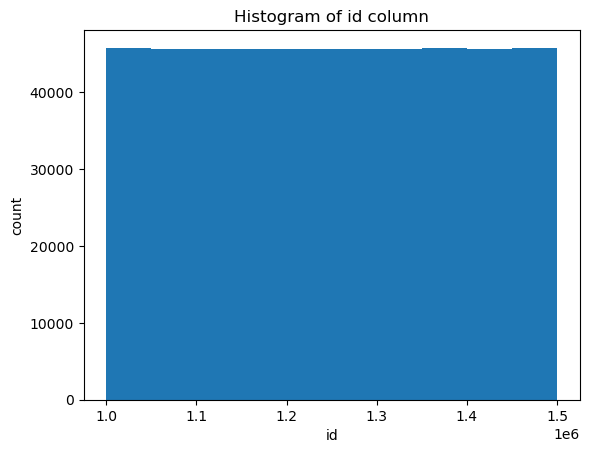

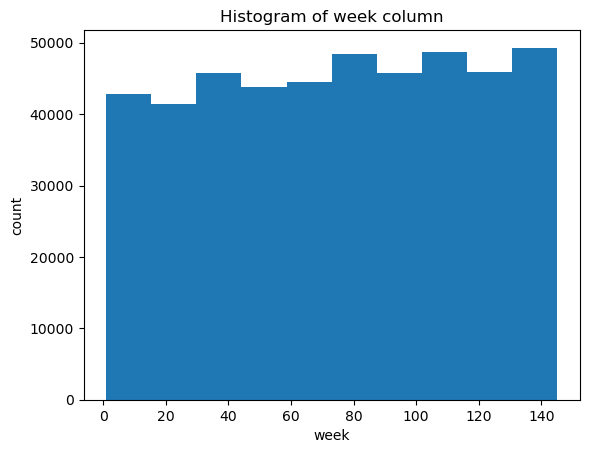

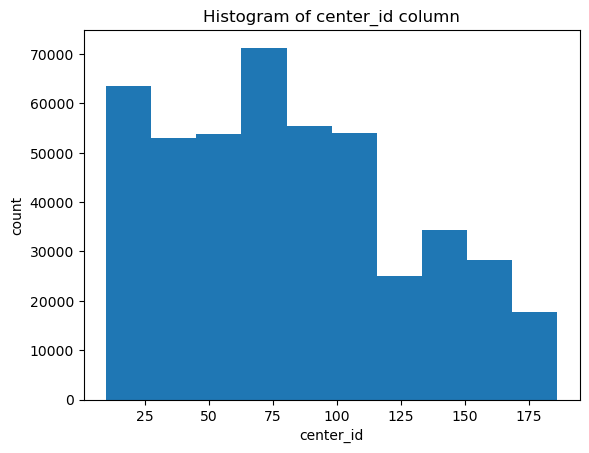

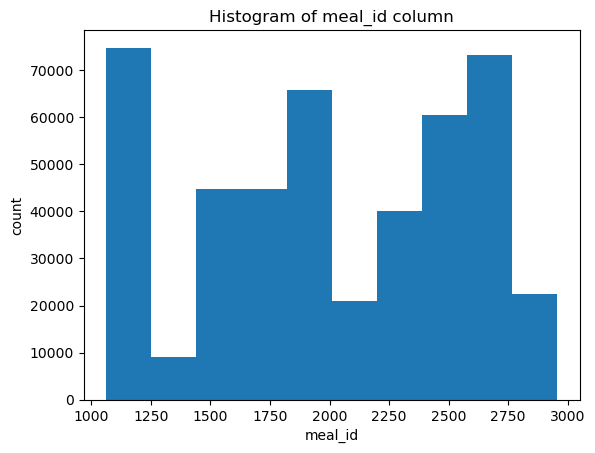

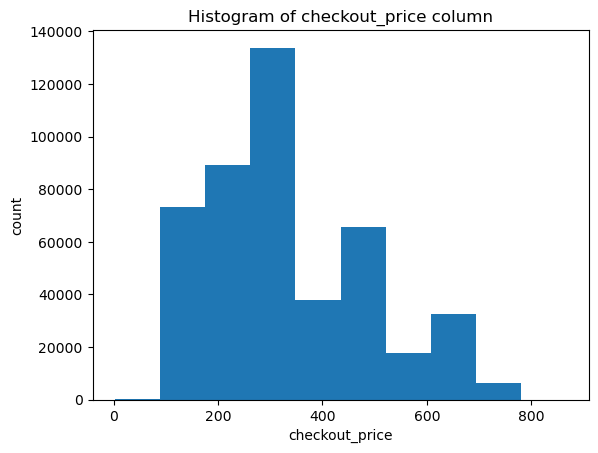

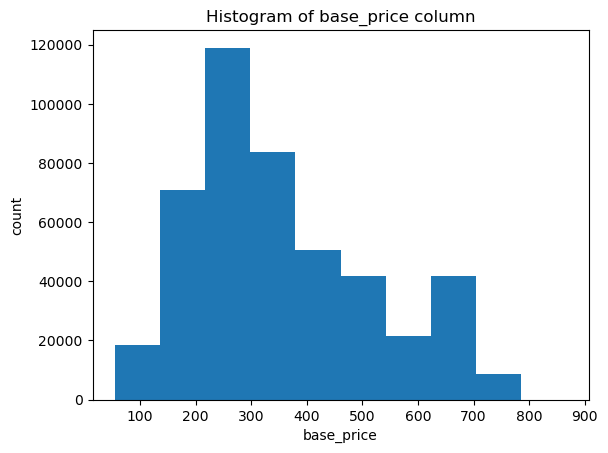

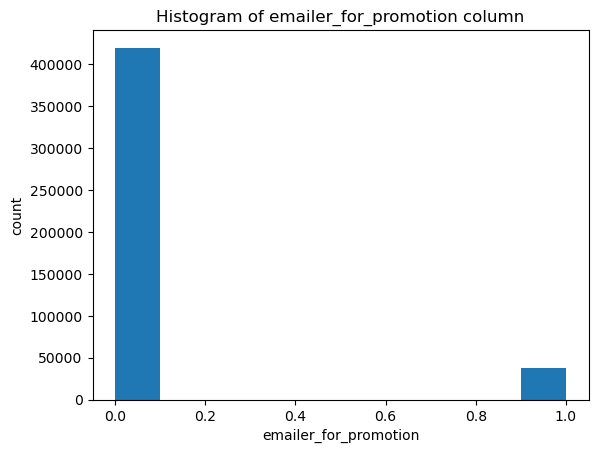

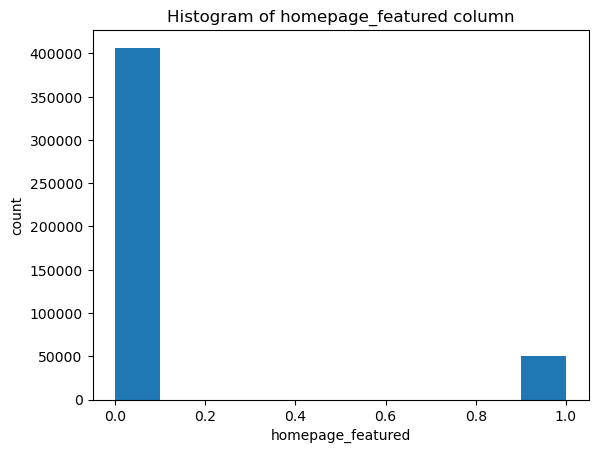

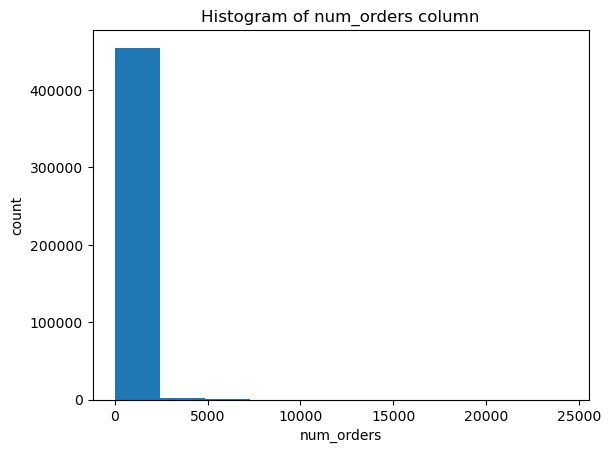

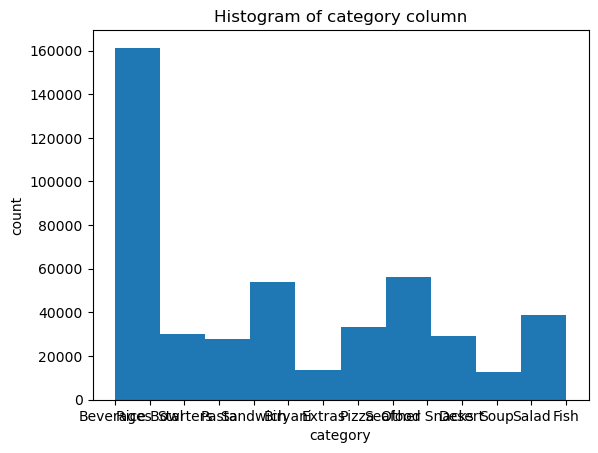

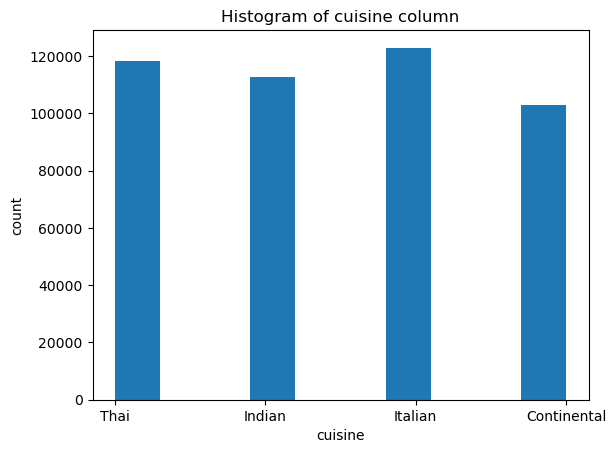

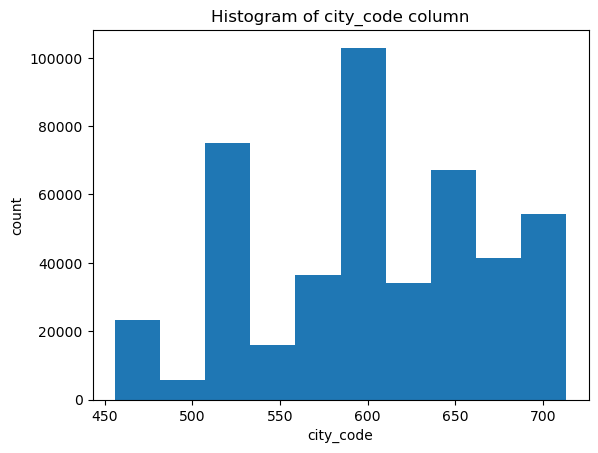

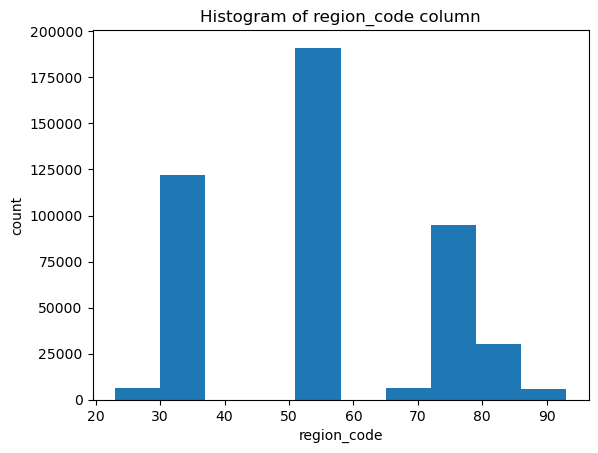

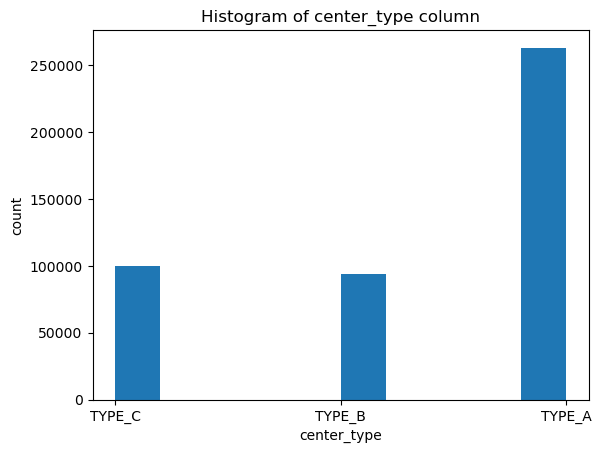

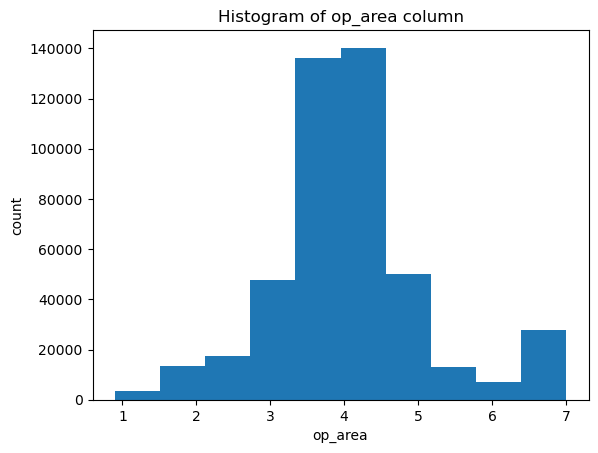

In [197]:
for col in df.columns:
  plt.hist(df[col])
  plt.title("Histogram of {} column".format(col))
  plt.xlabel(col)
  plt.ylabel("count")
  plt.show()

In [198]:
num_df = df.select_dtypes(include="number")

In [199]:
print("Numerical columns are")
num_col = num_df.columns.tolist()
print(num_col)

Numerical columns are
['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'num_orders', 'city_code', 'region_code', 'op_area']


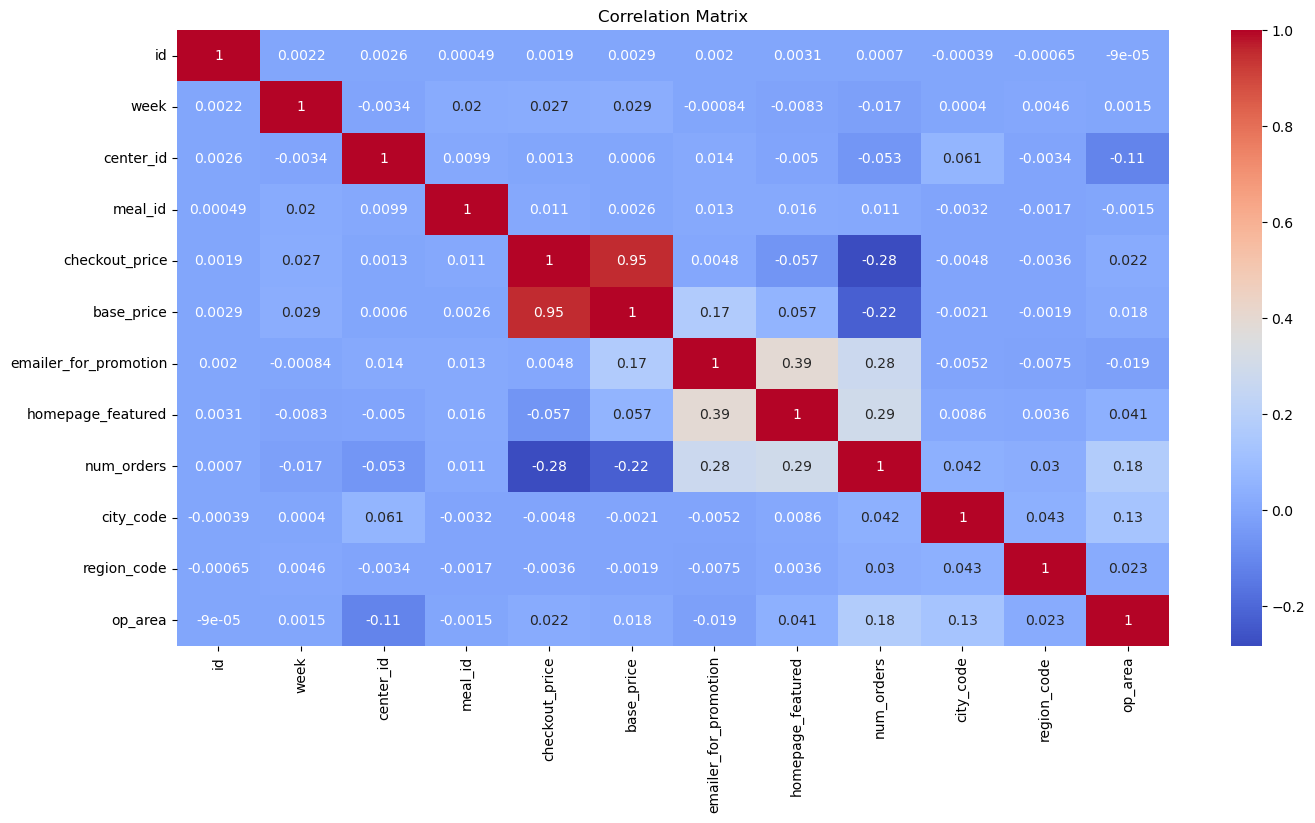

In [200]:
numerical_columns = df.select_dtypes(include=['int64','float64'])

correlation_matrix = numerical_columns.corr()


plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

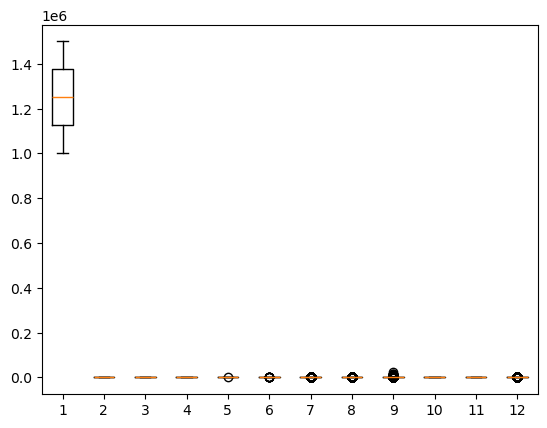

In [201]:
plt.boxplot(num_df)
plt.show()

In [202]:
def remove_outliers(df, column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    df[column_name] = df[column_name].clip(upper=upper_bound)
    df[column_name] = df[column_name].clip(lower=lower_bound)
    return df[column_name]

In [203]:
for col in num_col:
  num_df[col] = remove_outliers(num_df, col)

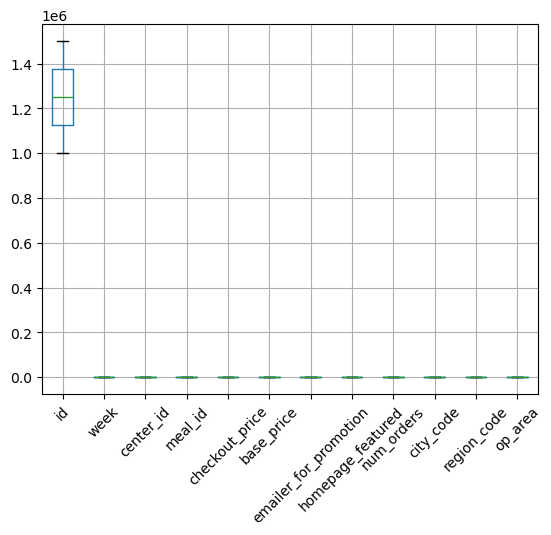

In [204]:
num_df.boxplot()
plt.xticks(rotation=45)
plt.show()

In [205]:
cat_df = df.select_dtypes(include="object_")

In [206]:
print("Categorical columns are")
cat_col = cat_df.columns.tolist()
print(cat_col)

Categorical columns are
['category', 'cuisine', 'center_type']


In [207]:
df=pd.get_dummies(df,columns=['category', 'cuisine', 'center_type'],dtype= int,drop_first=True)
df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,...,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Indian,cuisine_Italian,cuisine_Thai,center_type_TYPE_B,center_type_TYPE_C
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,...,0,0,0,0,0,0,0,1,0,1
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,...,0,0,0,0,0,0,0,1,0,1
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,...,0,0,0,0,0,0,0,1,0,1
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,...,0,0,0,0,0,1,0,0,0,1
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68,473,...,0,0,0,0,0,1,0,0,0,0
456544,1062036,145,61,2304,482.09,482.09,0,0,42,473,...,0,0,0,0,0,1,0,0,0,0
456545,1110849,145,61,2664,237.68,321.07,0,0,501,473,...,1,0,0,0,0,0,1,0,0,0
456546,1147725,145,61,2569,243.50,313.34,0,0,729,473,...,1,0,0,0,0,0,1,0,0,0


In [ ]:
# min max scaling for faetures having non-gaussian distribution in training dataset
min_scaler = MinMaxScaler()
numerical_colms1 = ['emailer_for_promotion','homepage_featured']
df[numerical_colms1] = min_scaler.fit_transform(df[numerical_colms1])
df

In [ ]:
# standard scaling for features having gaussian distribution in training dataset
std_scaler = StandardScaler()
numerical_colms3 = ['week','center_id','meal_id','checkout_price','base_price']
df[numerical_colms3] = std_scaler.fit_transform(df[numerical_colms3])
df

In [215]:
X = df.drop('num_orders', axis=1)
y = df['num_orders']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [233]:
reg_lin = LinearRegression()
reg_lin.fit(X_train,y_train)
y_pred = reg_lin.predict(X_test)



mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:",mse)
print("R2 Score:",r2)

Mean Squared Error: 90748.42415153676
R2 Score: 0.41188815988432126


In [247]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = Lasso(alpha=0.1)
model.fit(X, y)
y_pred = model.predict(X_test)
mse_poly = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse_poly:}') 

Mean Squared Error (MSE): 90741.01842892723


In [245]:
result_df = pd.DataFrame(y_pred)
result_df

,0
0,-1.051289
1,381.314310
2,226.017192
3,-46.680075
4,646.510590
...,...
136960,172.064305
136961,389.929402
136962,696.075772
136963,101.907782


In [249]:
id_series = pd.Series(id)
result_df = pd.concat([id_series,result_df],axis = 1)
result_df.rename(columns={0 : 'num_orders'}, inplace=True)

In [251]:
result_df = result_df.iloc[:,-1:2]

In [253]:
result_df

,num_orders
0,-1.051289
1,381.314310
2,226.017192
3,-46.680075
4,646.510590
...,...
136960,172.064305
136961,389.929402
136962,696.075772
136963,101.907782


In [257]:
df['id']

0         1379560
1         1466964
2         1346989
3         1338232
4         1448490
           ...   
456543    1271326
456544    1062036
456545    1110849
456546    1147725
456547    1361984
Name: id, Length: 456548, dtype: int64